In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
lambda_param = 1.4 #rate parameter

n = 100000 #number of realizations
unif_num = np.random.uniform(0,1,n) #uniform realizations stored in an array
wait_times = -np.log(unif_num) / lambda_param #iid exponential wait times

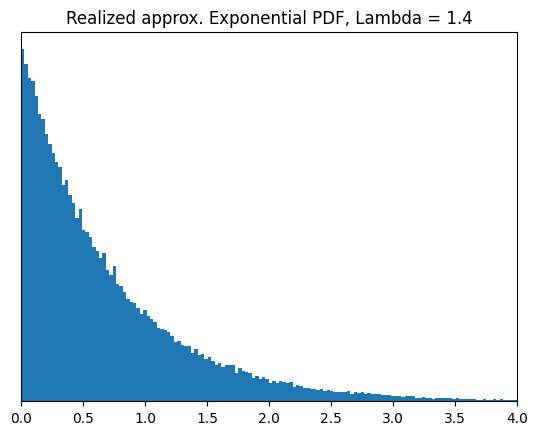

In [25]:
plot_title = f"Realized approx. Exponential PDF, Lambda = {lambda_param}"

plt.title(plot_title)
plt.hist(wait_times, bins = 300)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim(0, 4)
plt.show()